## Information of data_preprocessing.ipynb file
>Note: 
As the datasets are too huge to be stored in the GitHub Repository, please download them locally and then load the datasets in this jupyter notebook.
Datasets are taken from the following Kaggle website:
**<font color='#e69798'>https://www.kaggle.com/datasets/kartik2112/fraud-detection/data</font>**

in this jupyter notebook, our group attempts to....

## Importing Necessary Libraries

In [256]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from random import seed,sample
import datetime as dt
from datetime import datetime
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler # Undersampling for Unbalanced Data
from imblearn.over_sampling import SMOTE # Oversampling for Unbalanced Data
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler # Data Encoders
from sklearn.model_selection import train_test_split
import scipy.stats as stats
from sklearn.ensemble import RandomForestClassifier

pd.set_option('display.max_columns', 500)

%matplotlib inline

## Reading Datasets

In [257]:
# csv_path1 = "C:/Users/sieji/OneDrive/Documents/NUS/BT4012/bt4012/fraudTest.csv"
# csv_path2 = "C:/Users/sieji/OneDrive/Documents/NUS/BT4012/bt4012/fraudTrain.csv"
# test_data = pd.read_csv(csv_path1)
# train_data = pd.read_csv(csv_path2)

In [258]:
train_data = pd.read_csv('../fraudTrain.csv')
test_data = pd.read_csv('../fraudTest.csv')

In [259]:
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [260]:
test_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [261]:
# remove column 'Unnamed:0' for both datasets
train_data.drop(columns=['Unnamed: 0'], inplace=True)
test_data.drop(columns=['Unnamed: 0'], inplace=True)

To include: our rationale for merging fraudTrain.csv and fraudTest.csv

In [262]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  555719 non-null  object 
 1   cc_num                 555719 non-null  int64  
 2   merchant               555719 non-null  object 
 3   category               555719 non-null  object 
 4   amt                    555719 non-null  float64
 5   first                  555719 non-null  object 
 6   last                   555719 non-null  object 
 7   gender                 555719 non-null  object 
 8   street                 555719 non-null  object 
 9   city                   555719 non-null  object 
 10  state                  555719 non-null  object 
 11  zip                    555719 non-null  int64  
 12  lat                    555719 non-null  float64
 13  long                   555719 non-null  float64
 14  city_pop               555719 non-nu

In [263]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

## Merging fraudTrain.csv and fraudTest.csv into fraudDataset.csv
Helper Function: check if columns are the same in both fraudTrain.csv and fraudTest.csv

In [264]:
def check_same_columns(df1, df2):
    df1_cols_dtypes, df2_cols_dtypes = set(df1.dtypes.items()), set(df2.dtypes.items())
    
    # column-dtype pairs that are in df1 but not in df2 and vice-versa e.g. ('city', dtype('O'))
    in_df1_but_not_df2 = df1_cols_dtypes - df2_cols_dtypes
    in_df2_but_not_df1 = df2_cols_dtypes - df1_cols_dtypes

    if in_df1_but_not_df2 or in_df2_but_not_df1:
        print('There are differences in columns and/or their data types between the datasets.')
    else:
        print('Both the columns and their data types in the datasets are the same between the datasets.')
    return

In [265]:
check_same_columns(train_data, test_data)

Both the columns and their data types in the datasets are the same between the datasets.


Checked that the columns are the same with the same datatype, so we can proceed to combine the datasets, concatenate the rows to do some feature engineering

In [266]:
merged_data = pd.concat([train_data, test_data], axis=0) # by rows 

# Reset the index if needed
merged_data.reset_index(drop=True, inplace=True)

# Save the merged dataset to a new CSV file
merged_data.to_csv('../fraudDataset.csv', index=False)

# sanity check -> sum of length of both datasets = length of merged dataset
print((len(train_data) + len(test_data)) == len(merged_data))

True


## Load fraudDataset.csv 
- 1852393 Rows and 22 Columns

In [267]:
df = pd.read_csv('../fraudDataset.csv')
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   gender                 object 
 8   street                 object 
 9   city                   object 
 10  state                  object 
 11  zip                    int64  
 12  lat                    float64
 13  long                   float64
 14  city_pop               int64  
 15  job                    object 
 16  dob                    object 
 17  trans_num              object 
 18  unix_time              int64  
 19  merch_lat              float64
 20  merch_long             float64
 21  is_fraud               int64  
dtypes: float64(5), int

rename some columns for easier readibility

In [269]:
df.rename(columns={"trans_date_trans_time":"transaction_time",
                         "cc_num":"credit_card_number",
                         "amt":"amount(usd)",
                         "trans_num":"transaction_id"},
                inplace=True)
df

,transaction_time,credit_card_number,merchant,category,amount(usd),first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,transaction_id,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,MO,63453,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
1852390,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,TX,77566,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
1852391,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,WA,99323,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
1852392,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,ID,83643,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


convert datetime columns

`transaction_time` and `dob` should be in pd.datetime format and we also convert `unix_time` to exact timestamp

A Unix timestamp is interpreted the same regardless of region and is calculated from the same point in time regardless of the time zone. If you have a web application that is used over multiple timezones and you need date/time to reflect individual users' settings, use a timestamp.

In [270]:
df['transaction_time'] = pd.to_datetime(df['transaction_time'], infer_datetime_format=True)
df['dob'] = pd.to_datetime(df['dob'], infer_datetime_format=True)

# applly utcfromtimestamp function, drop `unix_time` 
df['time'] = df['unix_time'].apply(datetime.utcfromtimestamp)
df.drop(columns=['unix_time'], inplace=True)
df['hour_of_day'] = df['time'].dt.hour
df

,transaction_time,credit_card_number,merchant,category,amount(usd),first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,transaction_id,merch_lat,merch_long,is_fraud,time,hour_of_day
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,36.011293,-82.048315,0,2012-01-01 00:00:18,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0,2012-01-01 00:00:44,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0,2012-01-01 00:00:51,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,47.034331,-112.561071,0,2012-01-01 00:01:16,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,38.674999,-78.632459,0,2012-01-01 00:03:06,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,MO,63453,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,39.946837,-91.333331,0,2013-12-31 23:59:07,23
1852390,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,TX,77566,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,29.661049,-96.186633,0,2013-12-31 23:59:09,23
1852391,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,WA,99323,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,46.658340,-119.715054,0,2013-12-31 23:59:15,23
1852392,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,ID,83643,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,44.470525,-117.080888,0,2013-12-31 23:59:24,23


convert dtypes - hour_of_day, is_fraud should be category

In [271]:
df['is_fraud'] = df['is_fraud'].astype('category')
df['hour_of_day'] = df['hour_of_day'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 23 columns):
 #   Column              Dtype         
---  ------              -----         
 0   transaction_time    datetime64[ns]
 1   credit_card_number  int64         
 2   merchant            object        
 3   category            object        
 4   amount(usd)         float64       
 5   first               object        
 6   last                object        
 7   gender              object        
 8   street              object        
 9   city                object        
 10  state               object        
 11  zip                 int64         
 12  lat                 float64       
 13  long                float64       
 14  city_pop            int64         
 15  job                 object        
 16  dob                 datetime64[ns]
 17  transaction_id      object        
 18  merch_lat           float64       
 19  merch_long          float64       
 20  is

## Data Quality Checks and Data Preprocessing

**a. Checking for Duplicates**

In [272]:
# Check for any duplicates
print("Number of Rows with Duplicates:",df.duplicated().sum())

Number of Rows with Duplicates: 0


**b. Checking for Missing Values**

In [273]:
print('Any Missing Values?', df.isnull().sum().any())

Any Missing Values? False


**c. Checking if length of fraudDataset.csv matches the number of unique values in `trans_num` column**

*Rationale: `transaction_id` is the unique ID to identify each Credit Card Transaction, hence the total number of transactions (i.e. number of rows in dataset) should equal the number of unique values in the `transaction_id` column*

In [274]:
print('Number of unique values in `trans_num` column = total number of transactions?', df['transaction_id'].nunique() == len(df))

Number of unique values in `trans_num` column = total number of transactions? True


**d. Checking if all transactions are within <font color='#e69798'>1 Jan 2019 - 31 Dec 2020</font>**

*Rationale: This simulated credit card transaction dataset is generated for the above duration.*

In [275]:
df['transaction_time'] = pd.to_datetime(df['transaction_time']) # convert dtype to datetime object

# boolean mask which indicates the rows that trans_date_trans_time are within the specified range
mask_within_range = df['transaction_time'].between('2019-01-01 00:00:00', '2020-12-31 23:59:59')

if mask_within_range.all():
    print("All transactions are within the specified period of the transaction simulation.")
else:
    print("The following transactions are not within the specified period of the transaction simulation:")
    print(df[~mask_within_range])

All transactions are within the specified period of the transaction simulation.


In [276]:
# From the above, we can see that there are no duplicate values. We can then look at the dataset and look at the uniqueness for each category

# Number of Unique Values in Each Column
data = []
for column_name in df.columns:
    num_distinct_values = len(df[column_name].unique())
    data.append([column_name, num_distinct_values])

columns_nunique_df = pd.DataFrame(data, columns=['Column Name' ,'Number of Unique Values'])
columns_nunique_df

,Column Name,Number of Unique Values
0,transaction_time,1819551
1,credit_card_number,999
2,merchant,693
3,category,14
4,amount(usd),60616
5,first,355
6,last,486
7,gender,2
8,street,999
9,city,906


From the above, we can observe that there are a lot of unqiue values in the 'trans_date_trans_time' column.
We can then later seperate the column into hour, day, and month-year to get more information from the column

## Exploratory Data Analysis 
initial dataset: fraudDataset.csv

In [277]:
df.dtypes.value_counts()

object            10
float64            5
datetime64[ns]     3
int64              3
category           1
category           1
dtype: int64

got some issues - will fix again

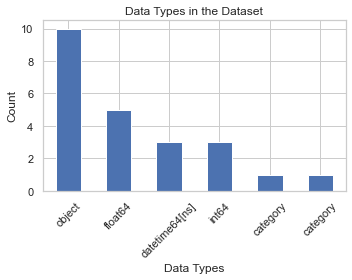

In [278]:
# Get data type counts
data_type_counts = df.dtypes.value_counts()

# Create a bar plot to visualize data types
plt.figure(figsize=(5, 4))
data_type_counts.plot(kind='bar')
plt.title('Data Types in the Dataset')
plt.xlabel('Data Types')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Highest count of the datatype is object and the lowest would be float64

In [279]:
print('Normal Transactions:', round(df['is_fraud'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Fruad Transactions:', round(df['is_fraud'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

Normal Transactions: 99.48 % of the dataset
Fruad Transactions: 0.52 % of the dataset


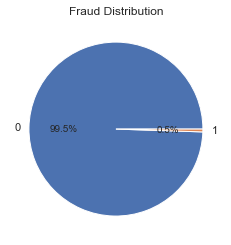

0    1842743
1       9651
Name: is_fraud, dtype: int64


In [280]:
# Count occurrences of '0' and '1' in the 'target_column'
counts = df['is_fraud'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Fraud Distribution')
plt.show()
print(counts)

We can see that we are also dealing with an imbalanced dataset, there are significantly more non-fraud transactions than fraud transactions.

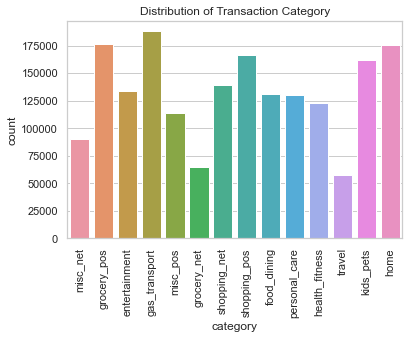

In [281]:
sns.countplot(x='category', data=df)
plt.title('Distribution of Transaction Category')
plt.xticks(rotation=90)
plt.show()


Category with the highest number of transactions is "gas_transport", which the one with the lowest would be "travel"

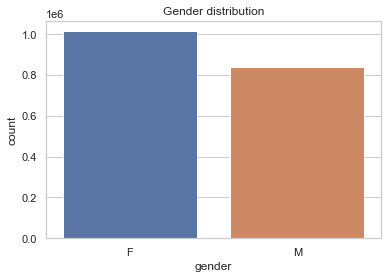

In [282]:
sns.countplot(x='gender', data=df)
plt.title('Gender distribution')
plt.show()

There are more transactions associated with female than that of males.

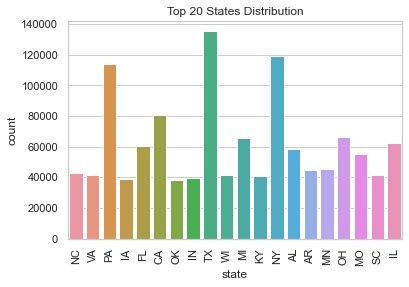

In [283]:
## Since there are many different states, we will plot the top 20
# Get the top 20 states by count
top_states = df['state'].value_counts().head(20).index

# Filter your DataFrame to only include the top 20 states
df_top20 = df[df['state'].isin(top_states)]

# Create a countplot for the top 20 states
sns.countplot(x='state', data=df_top20)
plt.title('Top 20 States Distribution')
plt.xticks(rotation=90)
plt.show()

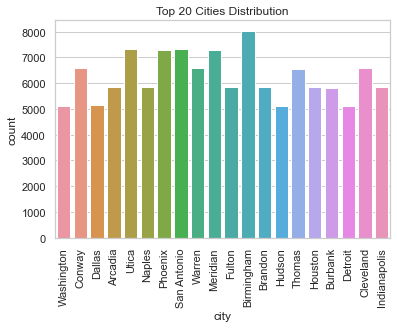

In [284]:
## Since there are many different cities we will plot the top 20
# Get the top 20 cities by count
top_cities = df['city'].value_counts().head(20).index

# Filter your DataFrame to only include the top 20 cities
df_top20 = df[df['city'].isin(top_cities)]

# Create a countplot for the top 20 states
sns.countplot(x='city', data=df_top20)
plt.title('Top 20 Cities Distribution')
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='amount(usd)', ylabel='Density'>

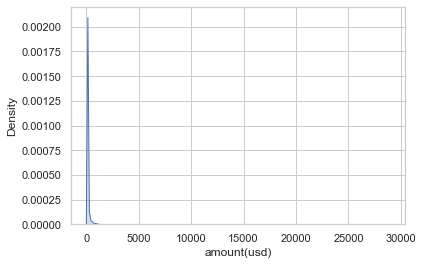

In [285]:
sns.kdeplot(df["amount(usd)"], fill=True)

The graph is being skewed severely, we can limit the range to view up to the 99 percentile

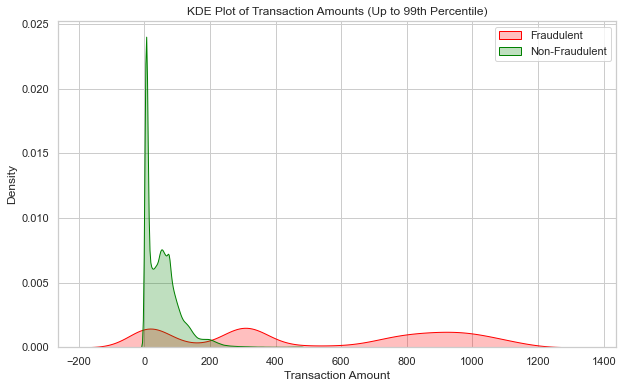

In [286]:
# Filter the 'train' DataFrame to separate fraudulent and non-fraudulent transactions
fraudulent_df = df[df['is_fraud'] == 1]
non_fraudulent_df = df[df['is_fraud'] == 0]

# Calculate the 99th percentile for both groups
fraudulent_99th_percentile = fraudulent_df['amount(usd)'].quantile(0.99)
non_fraudulent_99th_percentile = non_fraudulent_df['amount(usd)'].quantile(0.99)

# Create KDE plots for the 99th percentile values on the same axis
plt.figure(figsize=(10, 6))

# KDE plot for fraudulent transactions
sns.kdeplot(data=fraudulent_df[fraudulent_df['amount(usd)'] <= fraudulent_99th_percentile]['amount(usd)'], fill=True, common_norm=False, label='Fraudulent', color='red')

# KDE plot for non-fraudulent transactions
sns.kdeplot(data=non_fraudulent_df[non_fraudulent_df['amount(usd)'] <= non_fraudulent_99th_percentile]['amount(usd)'], fill=True, common_norm=False, label='Non-Fraudulent', color='green')

plt.title('KDE Plot of Transaction Amounts (Up to 99th Percentile)')
plt.xlabel('Transaction Amount')
plt.ylabel('Density')

plt.legend()
plt.show()

As you can see, the non-fraudulent transactions seem limited to $200 or less. However, the fraudulent transactions seem to peak at $300, and roughly $900, with even distribution spread throughout the peak.

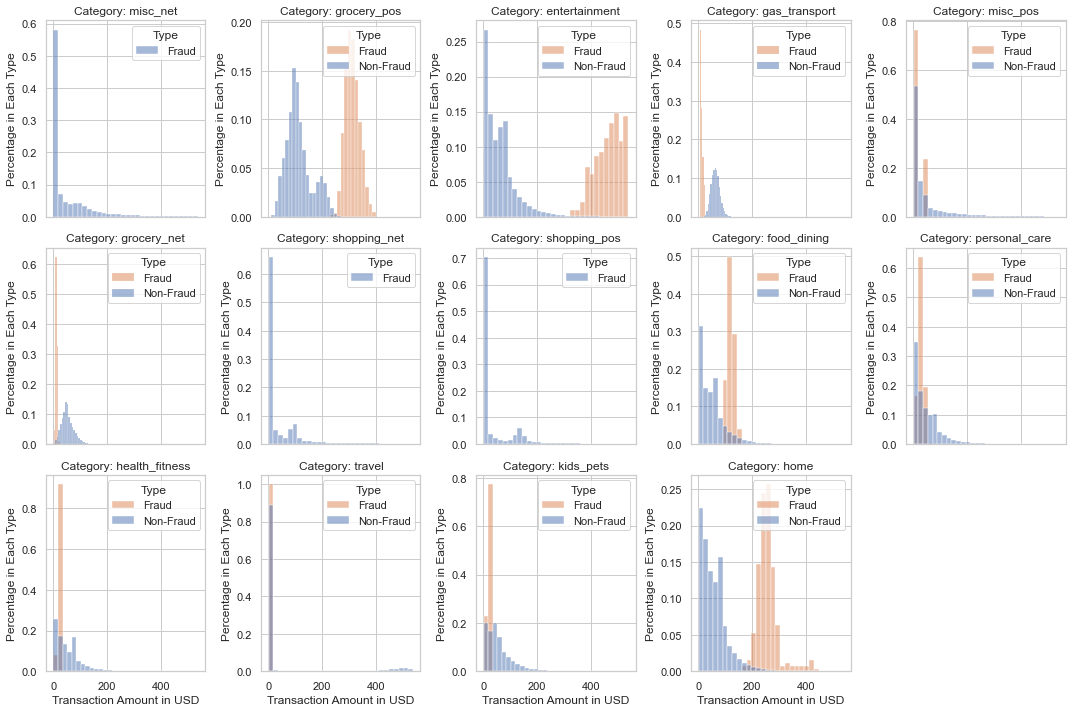

In [287]:


# Extract unique categories from the 'category' column
unique_categories = df['category'].unique()

# Calculate the number of unique categories
num_categories = len(unique_categories)

# Determine the number of rows and columns for subplots
num_rows = int(num_categories**0.5)
num_cols = (num_categories // num_rows) + 1

# Create a figure and a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10), sharex=True)

# Flatten the axes to handle varying subplot arrangements
axes = axes.flatten()

# Iterate through each category for visualization
for i, category in enumerate(unique_categories):
    # Create a subset of the DataFrame for the current category
    data_category = df[df['category'] == category]

    # Determine the current subplot
    ax = axes[i]

    # Create a KDE plot for transaction amounts in the current category
    sns.histplot(data=data_category[data_category['amount(usd)'] <= df['amount(usd)'].quantile(0.99)
],
                 x='amount(usd)', hue='is_fraud', stat='probability',
                 common_norm=False, bins=30, ax=ax)

    ax.set_ylabel('Percentage in Each Type')
    ax.set_xlabel('Transaction Amount in USD')
    ax.set_title(f'Category: {category}')
    ax.legend(title='Type', labels=['Fraud', 'Non-Fraud'])

# Remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Adjust subplot layout for neat arrangement
plt.tight_layout()

# Display the subplots
plt.show()

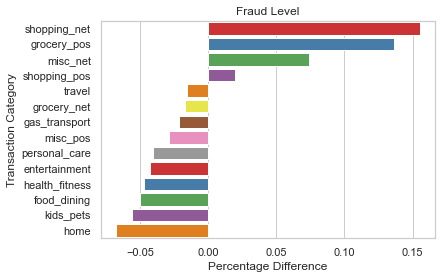

In [288]:
##Creating analysis of fraud levels across different categories in the dataset
# Extract non-fraudulent transactions and calculate percentages
non_fraudulent = df[df['is_fraud'] == 0]['category'].value_counts(normalize=True).reset_index()
non_fraudulent.columns = ['category', 'non_fraud_percentage']

# Extract fraudulent transactions and calculate percentages
fraudulent = df[df['is_fraud'] == 1]['category'].value_counts(normalize=True).reset_index()
fraudulent.columns = ['category', 'fraud_percentage']

# Merge and calculate fraud level
fraud_level_df = non_fraudulent.merge(fraudulent, on='category')
fraud_level_df['fraud_level'] = fraud_level_df['fraud_percentage'] - fraud_level_df['non_fraud_percentage']

fraud_level_df

# Define a custom color palette
custom_palette = sns.color_palette("Set1")

# Create a bar plot to visualize the 'fraud_level' for each category
ax = sns.barplot(y='category', x='fraud_level',
                 data=fraud_level_df.sort_values('fraud_level', ascending=False), palette=custom_palette)

# Set labels and title
ax.set_xlabel('Percentage Difference')
ax.set_ylabel('Transaction Category')
plt.title('Fraud Level')

# Display the plot
plt.show()


Looking at the graph above, it seems the categories ("shopping_net", "grocery_pos", "misc_net", "shopping_pos") have a positive percentage difference, compared to the other categories. The categories ("food_dining", "kids_pet", "home") are the categories that have lowest likelihood of being involved in fraudulent activities.

In [289]:
## 'trans_date_trans_time' feature can be converted to days of week

# Derive 'Day of Week' Feature from 'Transaction Time' Feature
df['day_of_week'] = df['transaction_time'].dt.day_name()
df['day_of_week']

0           Tuesday
1           Tuesday
2           Tuesday
3           Tuesday
4           Tuesday
             ...   
1852389    Thursday
1852390    Thursday
1852391    Thursday
1852392    Thursday
1852393    Thursday
Name: day_of_week, Length: 1852394, dtype: object

In [290]:
## 'trans_date_trans_time' feature are converted to month, year

# Derive 'month - year' feature
df['Month']  = pd.DatetimeIndex(df['transaction_time']).month
df['Year'] = pd.DatetimeIndex(df['transaction_time']).year

df.head()

,transaction_time,credit_card_number,merchant,category,amount(usd),first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,transaction_id,merch_lat,merch_long,is_fraud,time,hour_of_day,day_of_week,Month,Year
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,36.011293,-82.048315,0,2012-01-01 00:00:18,0,Tuesday,1,2019
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0,2012-01-01 00:00:44,0,Tuesday,1,2019
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0,2012-01-01 00:00:51,0,Tuesday,1,2019
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,47.034331,-112.561071,0,2012-01-01 00:01:16,0,Tuesday,1,2019
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,38.674999,-78.632459,0,2012-01-01 00:03:06,0,Tuesday,1,2019


In [291]:
## 'dob' calculated and converted to age

# Convert 'DOB' to datetime if it's not already
df['dob'] = pd.to_datetime(df['dob'])
# Calculate age
transaction_date = df['transaction_time']
df['age'] = transaction_date.dt.year - df['dob'].dt.year # age = transaction_date - dob
# Sort the DataFrame by the "age" column in ascending order
df.sort_values(by='age')
df['age']

0          31
1          41
2          57
3          52
4          33
           ..
1852389    54
1852390    21
1852391    39
1852392    55
1852393    27
Name: age, Length: 1852394, dtype: int64

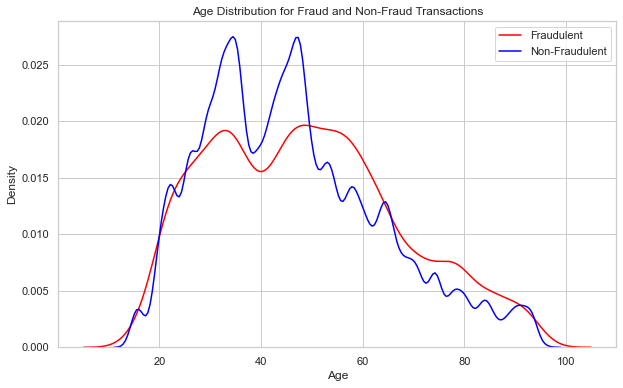

In [292]:
# Create KDE plots for age distribution
plt.figure(figsize=(10, 6))

# KDE plot for fraud transactions
sns.kdeplot(data=df[df['is_fraud'] == 1]['age'], label='Fraudulent', color='red')

# KDE plot for non-fraud transactions
sns.kdeplot(data=df[df['is_fraud'] == 0]['age'], label='Non-Fraudulent', color='blue')

plt.title('Age Distribution for Fraud and Non-Fraud Transactions')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()

plt.show()

As seen in the graph, for non-fraudulent transactions, the density peaks around 35-40 years, and then again at 50. The graph for fraudulent transaction opposes this, as even though the peaks are similar in terms of age, it has a much more even distribution across all ages

In [293]:
# Create bins to categorize the age group
bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20','21-40','41-60', '61-80', '81-100']

# Use the cut function to create the age_group feature
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, include_lowest=True)

# Display the DataFrame with the new age_group feature
df['age_group']

0          21-40
1          41-60
2          41-60
3          41-60
4          21-40
           ...  
1852389    41-60
1852390    21-40
1852391    21-40
1852392    41-60
1852393    21-40
Name: age_group, Length: 1852394, dtype: category
Categories (5, object): ['0-20' < '21-40' < '41-60' < '61-80' < '81-100']

In [294]:
df.head()

,transaction_time,credit_card_number,merchant,category,amount(usd),first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,transaction_id,merch_lat,merch_long,is_fraud,time,hour_of_day,day_of_week,Month,Year,age,age_group
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,36.011293,-82.048315,0,2012-01-01 00:00:18,0,Tuesday,1,2019,31,21-40
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0,2012-01-01 00:00:44,0,Tuesday,1,2019,41,41-60
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0,2012-01-01 00:00:51,0,Tuesday,1,2019,57,41-60
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,47.034331,-112.561071,0,2012-01-01 00:01:16,0,Tuesday,1,2019,52,41-60
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,38.674999,-78.632459,0,2012-01-01 00:03:06,0,Tuesday,1,2019,33,21-40


In [295]:
#Calculate distance between merchant and home location
df['latitudinal_distance'] = abs(round(df['merch_lat']-df['lat'],3))
df['longitudinal_distance'] = abs(round(df['merch_long']-df['long'],3))
df['longitudinal_distance']
df.head()

,transaction_time,credit_card_number,merchant,category,amount(usd),first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,transaction_id,merch_lat,merch_long,is_fraud,time,hour_of_day,day_of_week,Month,Year,age,age_group,latitudinal_distance,longitudinal_distance
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,36.011293,-82.048315,0,2012-01-01 00:00:18,0,Tuesday,1,2019,31,21-40,0.068,0.870
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0,2012-01-01 00:00:44,0,Tuesday,1,2019,41,41-60,0.271,0.024
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0,2012-01-01 00:00:51,0,Tuesday,1,2019,57,41-60,0.970,0.108
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,47.034331,-112.561071,0,2012-01-01 00:01:16,0,Tuesday,1,2019,52,41-60,0.804,0.447
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,38.674999,-78.632459,0,2012-01-01 00:03:06,0,Tuesday,1,2019,33,21-40,0.254,0.830


drop irrelevant columns

In [296]:
columns_to_drop = ['transaction_time', 'credit_card_number', 'merchant', 'first', 'last', 'street','city','zip','dob','city_pop','transaction_id','time','Month','Year','age_group','latitudinal_distance','longitudinal_distance']
df = df.drop(columns=columns_to_drop)
df.head(10)

,category,amount(usd),gender,state,lat,long,job,merch_lat,merch_long,is_fraud,hour_of_day,day_of_week,age
0,misc_net,4.97,F,NC,36.0788,-81.1781,"Psychologist, counselling",36.011293,-82.048315,0,0,Tuesday,31
1,grocery_pos,107.23,F,WA,48.8878,-118.2105,Special educational needs teacher,49.159047,-118.186462,0,0,Tuesday,41
2,entertainment,220.11,M,ID,42.1808,-112.2620,Nature conservation officer,43.150704,-112.154481,0,0,Tuesday,57
3,gas_transport,45.00,M,MT,46.2306,-112.1138,Patent attorney,47.034331,-112.561071,0,0,Tuesday,52
4,misc_pos,41.96,M,VA,38.4207,-79.4629,Dance movement psychotherapist,38.674999,-78.632459,0,0,Tuesday,33
5,gas_transport,94.63,F,PA,40.3750,-75.2045,Transport planner,40.653382,-76.152667,0,0,Tuesday,58
6,grocery_net,44.54,F,KS,37.9931,-100.9893,Arboriculturist,37.162705,-100.153370,0,0,Tuesday,26
7,gas_transport,71.65,M,VA,38.8432,-78.6003,"Designer, multimedia",38.948089,-78.540296,0,0,Tuesday,72
8,misc_pos,4.27,F,PA,40.3359,-79.6607,Public affairs consultant,40.351813,-79.958146,0,0,Tuesday,78
9,grocery_pos,198.39,F,TN,36.5220,-87.3490,Pathologist,37.179198,-87.485381,0,0,Tuesday,45


Train Test Split

In [297]:
# stratified sampling for imbalanced classes
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42) 

Export X_train, X_test, y_train, y_test

In [ ]:
X_train.to_csv('../X_train.csv', index=False)
X_test.to_csv('../X_test.csv', index=False)
y_train.to_csv('../y_train.csv', index=False)
y_test.to_csv('../y_test.csv', index=False)

### **from here on, depending on what model we are running, then do encoding and feature scaling accordingly... becuz it depends on model requirements**

Encode Categorical Variables using OHE

In [ ]:
# # encode categorical variables
# one_hot_encoder = OneHotEncoder(drop='first')
# categorical_cols = ['category','gender','state','day_of_week']

Feature Scaling for Numerical Variables (excl. `amount(usd)`) using Standard Scaler 

In [ ]:
# numerical_cols = ['lat','long','city_pop','merch_lat','merch_long','age','']

Feature Scaling of `amount(usd)`

One hot encoding

In [ ]:
# # Encoding features with data type strings
# ohe_columns = ['category', 'day_of_week', 'age_group'] # features to be encoded to integers
# ohe = OneHotEncoder(sparse=False).fit(df[ohe_columns]) # encode the columns specified and return an array
# encoded = ohe.transform(df[ohe_columns]) # transformed the array
# encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out()) # converted array to a data frame
# df = pd.concat([df[[x for x in df.columns if x not in ohe_columns]].reset_index(drop=True),encoded_df], axis=1)
# # finally concatenate both dataframes and in the process remove 'type' and 'DestType' columns with the encoded ones
# df.head()


In [ ]:
# # Convert categorical column into numerical 
# df['category_entertainment']=df['category_entertainment'].astype(int)
# df['category_kids_pets']=df['category_kids_pets'].astype(int)
# df['category_shopping_pos']=df['category_shopping_pos'].astype(int)
# df['category_travel']=df['category_travel'].astype(int)
# df['category_health_fitness']=df['category_health_fitness'].astype(int)
# df['category_home']=df['category_home'].astype(int)
# df['category_misc_pos']=df['category_misc_pos'].astype(int)
# df['category_shopping_net']=df['category_shopping_net'].astype(int)
# df['category_gas_transport']=df['category_gas_transport'].astype(int)
# df['category_misc_net']=df['category_misc_net'].astype(int)
# df['category_grocery_net']=df['category_grocery_net'].astype(int)
# df['category_kids_pets']=df['category_kids_pets'].astype(int)
# df['category_personal_care'] = df['category_personal_care'].astype(int)
# df['category_grocery_pos'] = df['category_grocery_pos'].astype(int)

In [ ]:
# # Convert gender into numerical 
# df.gender=df.gender.apply(lambda x: 1 if x=="M" else 0)

Applying scaling to the feature 'amt'

In [ ]:
# def check_normality(df, feature):
#     plt.figure(figsize=(8, 8))
#     ax1 = plt.subplot(1, 1, 1)
#     stats.probplot(df[feature], dist=stats.norm, plot=ax1)
#     ax1.set_title(f'{feature} Q-Q plot', fontsize=20)
#     sns.despine()

#     mean = df[feature].mean()
#     std = df[feature].std()
#     skew = df[feature].skew()
#     print(f'{feature} : mean: {mean:.2f}, std: {std:.2f}, skew: {skew:.2f}')   

In [ ]:
# check_normality(df, "amt")

As observed, the skewness of the feature is quite significant.

In [ ]:
# df["amt_log"] = np.log10(df["amt"])
# sns.kdeplot(df["amt_log"], fill=True);

In [ ]:
# check_normality(df,"amt_log")

We can see that skewness has decreased significantly, going from 40.81 to -0.45. Therefore, scaling has helped reduce the skewness of this feature.

In [ ]:
# df.info()

In [ ]:
# ## Dropping some columns that will not be relevant 

# columns_to_drop = ['first', 'last', 'merchant', 'trans_num', 'unix_time', 'dob', 'cc_num', 'street', 'trans_date_trans_time', 'city', 'state', 'job', 'amt']

# # Use the drop method to remove the specified columns
# df2 = df.drop(columns=columns_to_drop)

# ## extract time components from time
# df2[['hour', 'minute', 'second']] = df2['time'].str.split(':', expand=True).astype(int)
# df2 = df2.drop(columns = "time")
# df2.info()

In [ ]:
# ## Perform oversampling to imbalanced dataset
# col = [c for c in df2.columns.to_list() if c not in ['is_fraud']] # Save the names of columns apart from the target column
# X = df2[col] # Split target column from other columns and save the columns in another data frame
# Y = df2['is_fraud'] # Split target column from other columns and save in another data frame

In [ ]:
# # Apply SMOTE over sampling for minority of the two values (which in this case is 1) to balance the data
# smt = SMOTE(random_state=42, sampling_strategy='minority')
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)
# X_train_smoted, y_train_smoted = smt.fit_resample(X_train, y_train) 

# # Converting the tuples back to a data frame
# X_samp = pd.DataFrame(X_train_smoted, columns=col)
# Y_samp = pd.DataFrame(y_train_smoted, columns=['is_fraud'])
# df3 = pd.concat([X_samp, Y_samp], axis=1)
# print(Y_samp.value_counts())

In [ ]:
# # Sample ratio after Over Sampling
# Y_samp.value_counts().plot.bar(figsize=(6,8), rot=0)
# plt.title('Count of SMOTE Training Set')

In [ ]:
# df3.info()

In [ ]:
# frac = 0.05  

# # First subplot
# sns.set(style="whitegrid")
# plt.figure(figsize=(10, 4))
# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# sns.scatterplot(
#     x="merch_lat",  # Replace with the appropriate column from your data
#     y="merch_long",  # Replace with the appropriate column from your data
#     hue="is_fraud",
#     data=df2.sample(frac=frac, random_state=42),
#     palette="pastel",
#     ax=axes[0]
# )
# axes[0].set_title("Original Data")

# # Second subplot
# sns.scatterplot(
#     x="merch_lat",  # Replace with the appropriate column from your data
#     y="merch_long",  # Replace with the appropriate column from your data
#     hue="is_fraud",
#     data=df3.sample(frac=frac, random_state=42),
#     palette="pastel",
#     ax=axes[1]
# )
# axes[1].set_title("SMOTE Data")

# # Main title
# fig.suptitle('Scatter plot Comparison of Original and SMOTE Data (Sample with frac=0.05)', fontsize=15, y=1)
# plt.tight_layout()
# plt.show()


From the plot, we observe that the fraudulent transactions are not merely duplicated. Instead, SMOTE creates new ones that are similar but not identical to the originals.